In [1]:
from qiskit import QuantumCircuit

In [2]:
qc = QuantumCircuit(4, 3)
#3 qubits and 3 classical

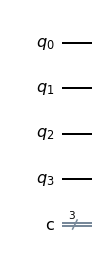

In [3]:
qc.draw(output='mpl')

Because simulating a quantum computer is believed to be difficult for classical computers (the best algorithms we have grow exponentially with the number of qubits), these simulations are only possible for circuits with small numbers of qubits (up to ~30 qubits),

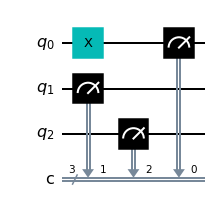

In [4]:
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.x(0)
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

In [5]:
def draw(agent):
    return agent.draw(output='mpl')

In [6]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

In [7]:
job = sim.run(qc) 

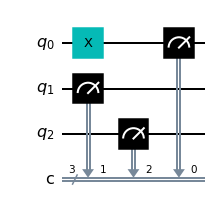

In [8]:
draw(qc)

In [9]:
result = job.result() 

In [10]:
result

Result(backend_name='aer_simulator', backend_version='0.11.0', qobj_id='2e024576-96b3-4f4f-9ba3-690e3ba4275d', job_id='44b6480b-6962-4750-b78b-404f969fa2b6', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-79', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=454638193, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 3, 'sample_measure_time': 0.0009503, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'fusion': {'enabled': False}}, time_taken=0.0019204)], date=2022-10-25T11:01

In [11]:
result.get_counts()

{'001': 1024}

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times

In [12]:
qc = QuantumCircuit(3, 3)

In [13]:
qc.x([0,1])

In [14]:
qc.measure([0,1,2], [0,1,2])

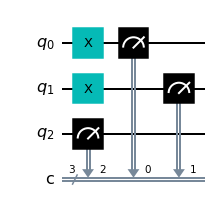

In [15]:
draw(qc)

In [16]:
job = sim.run(qc)

In [17]:
result = job.result()

In [18]:
result.get_counts()

{'011': 1024}

In [19]:
qc = QuantumCircuit(3, 3)
qc.x([1, 2])
qc.measure([0,1,2], [0,1,2])

In [20]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'110': 1024}

In [21]:
qc = QuantumCircuit(3, 3)
qc.x([2])
qc.measure([0,1,2], [0,1,2])
job = sim.run(qc)
result = job.result()
result.get_counts()

{'100': 1024}

## Create an Adder

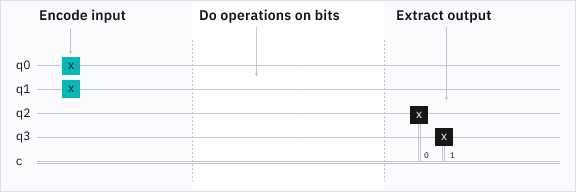

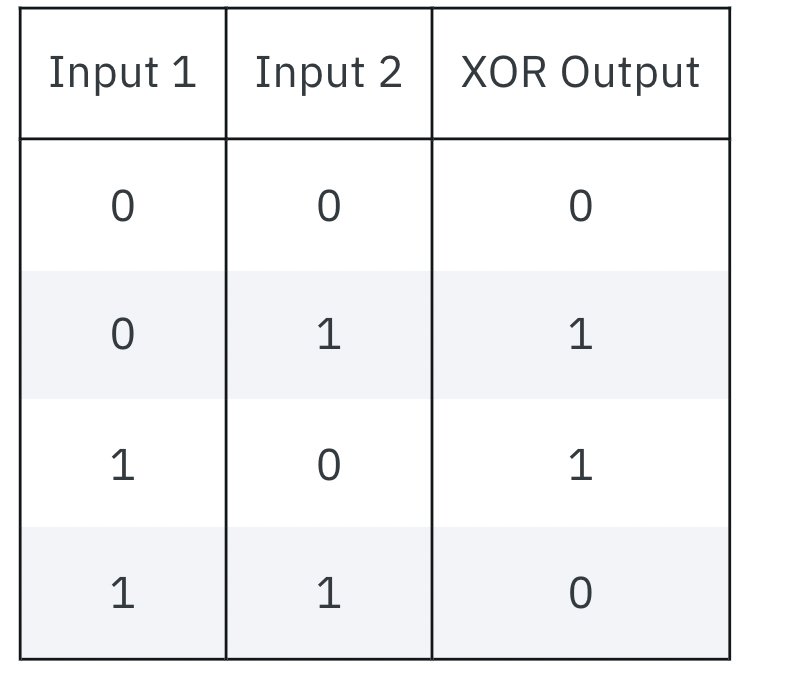

One acts as the control qubit (this is the one with the little dot). The other acts as the target qubit (with the big circle and cross - kind of like a target mark).

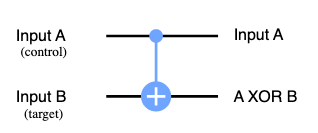

Result:  {'11': 1024}


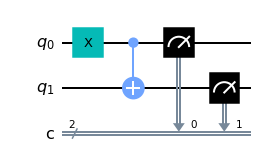

In [22]:
# Create quantum circuit with 2 qubits and 2 classical bits
# [0] -> 1; 1 + 0 => CCNOT
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
#display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())
draw(qc)

## From Half Adder to Full Adder

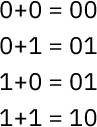

like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state 1. This new gate is called the Toffoli
The Toffoli gate.

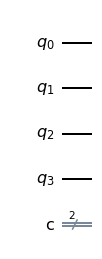

In [23]:
qc = QuantumCircuit(4, 2)
draw(qc)

In [24]:
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 3)

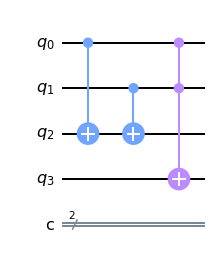

In [25]:
draw(qc)

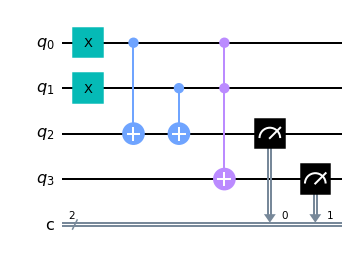

In [28]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
draw(test_qc)

In [29]:
job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts() 

{'10': 1024}

## What is Bit?

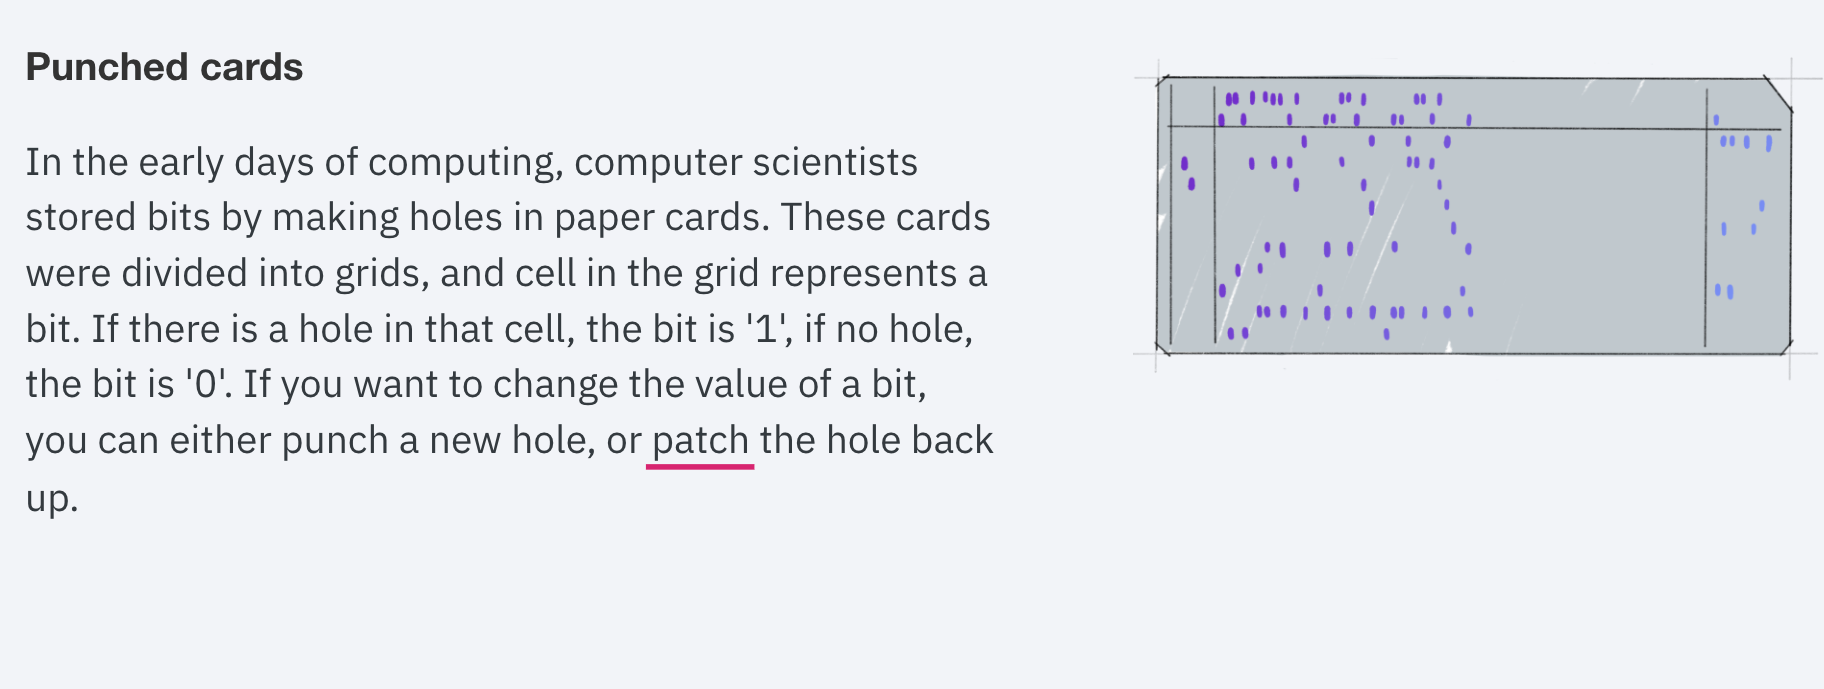

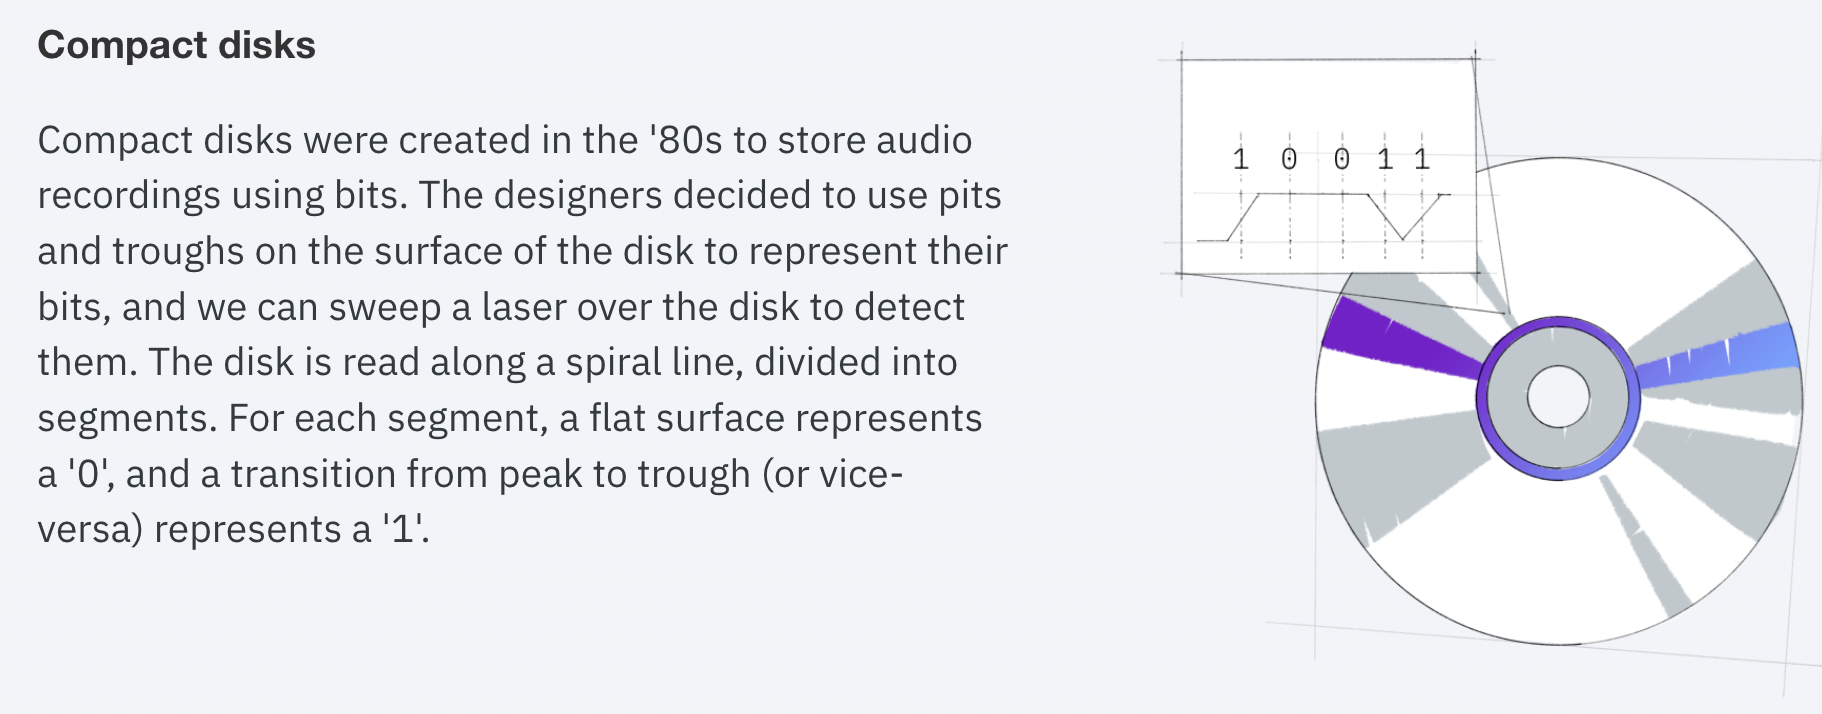

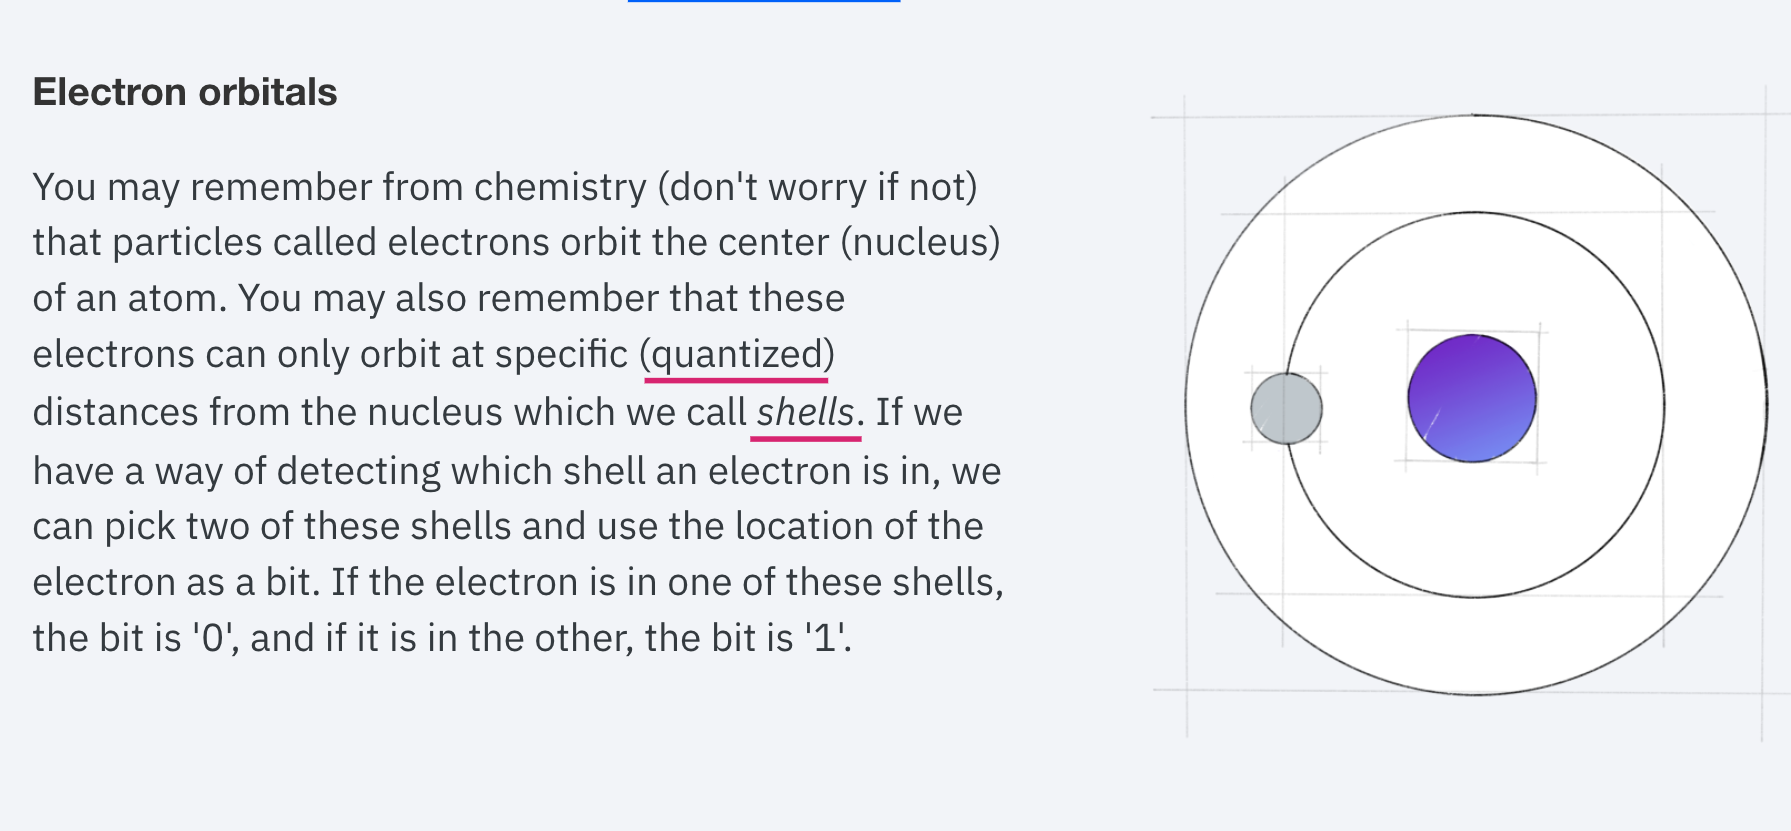

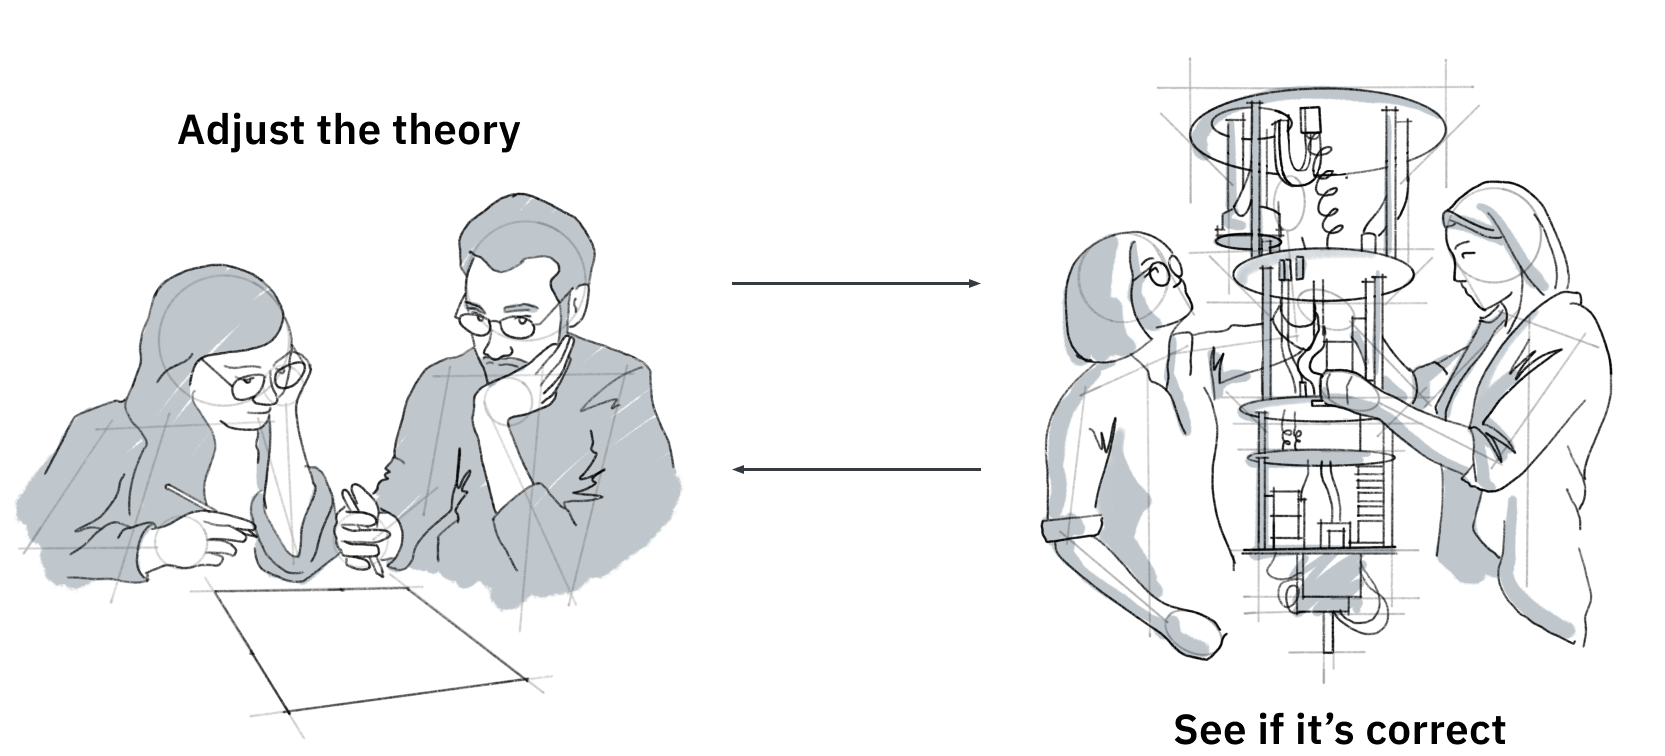

“Classical physics” is the name for the set of rules that scientists came up with before the early 1900s, and it’s really good at predicting the behaviour of things like cricket balls and car engines.

But the electron orbiting an atom is a bit different. Around the early 1900s, scientists started being able to study things on the atomic scale. They found that really small things like atoms behave differently to the things we interact with in our day-to-day lives, and in certain cases the rules of classical physics weren’t quite right. The physics they had needed modifying, so the scientists came up with a more accurate set of rules which became known as “quantum physics”.

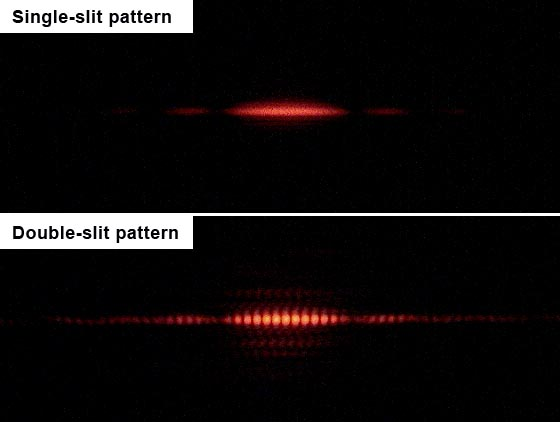

For computer scientists, a natural question is: “What if our bits followed the rules of quantum physics instead of classical physics?”. We call these bits “qubits” for “quantum bit”, and computers that can operate on these bits are called “quantum computers”.

## Exploring qubits - Probability


{'01': 1024}


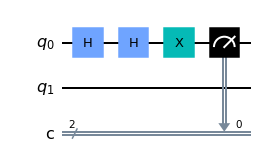

In [30]:
pr_qc = QuantumCircuit(2, 2)
#pr_qc.x(0)
pr_qc.h(0)
pr_qc.h(0)
pr_qc.x(0)
pr_qc.measure(0, 0)
job = sim.run(pr_qc)
result = job.result()
print(result.get_counts() )
draw(pr_qc)

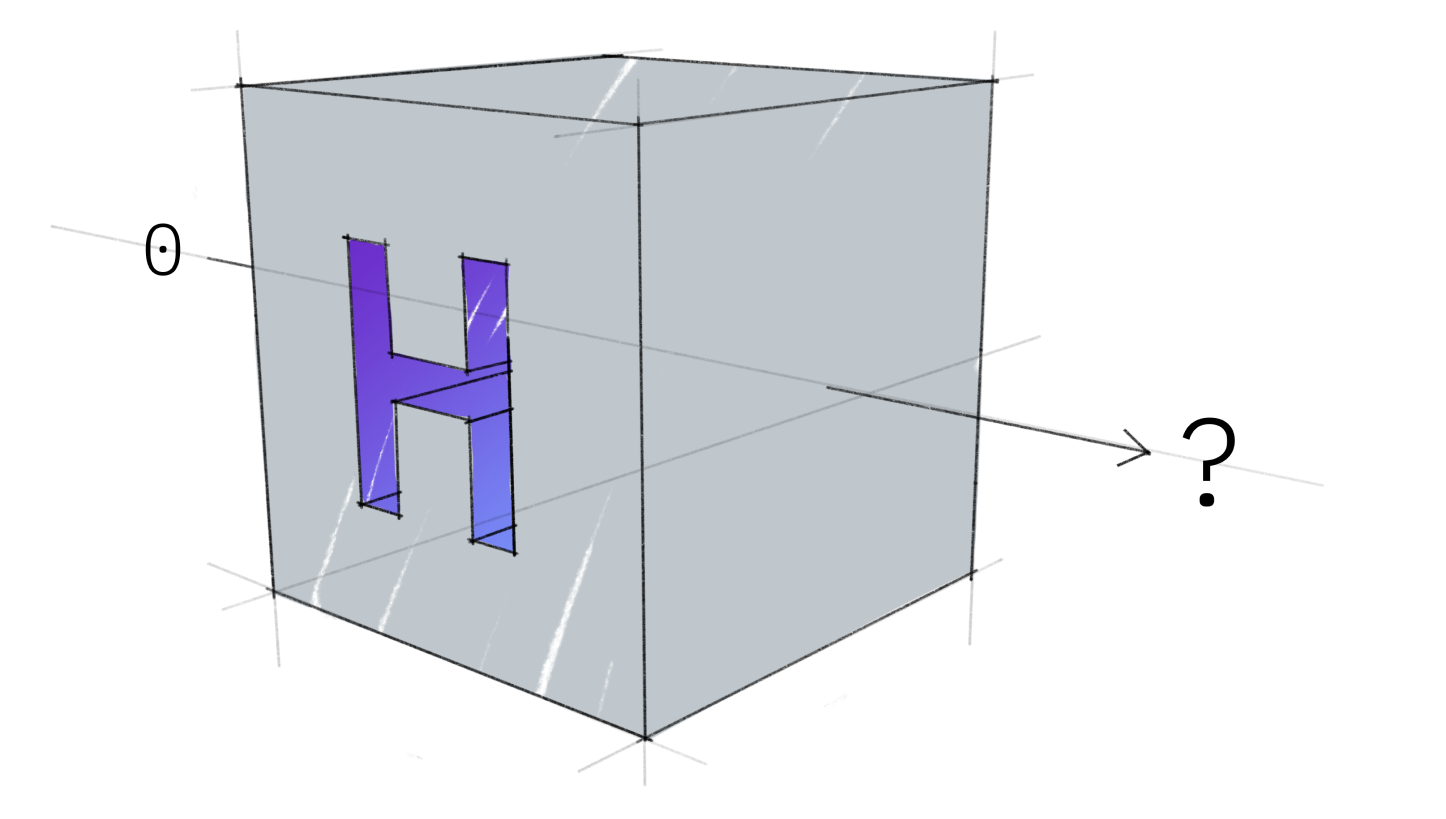

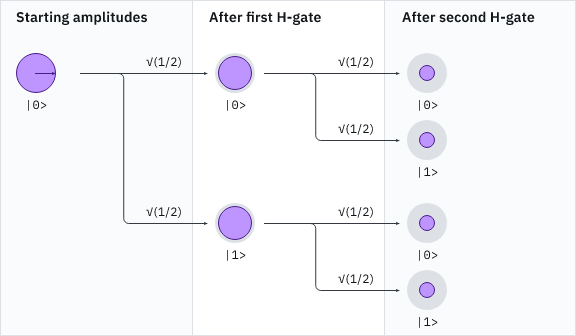

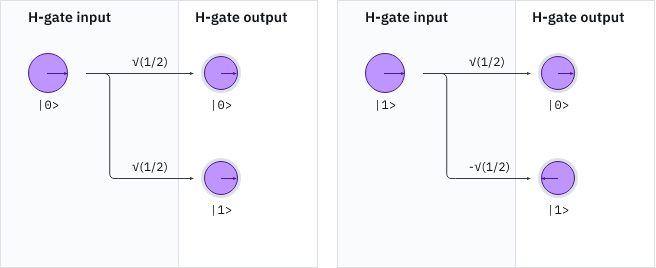

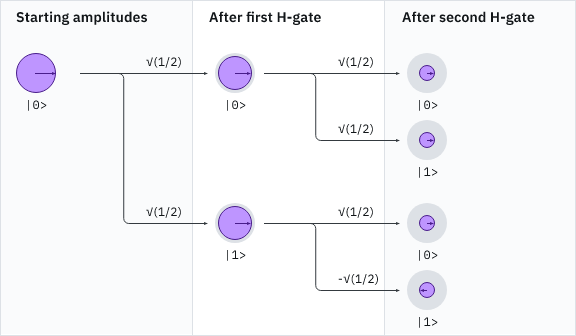

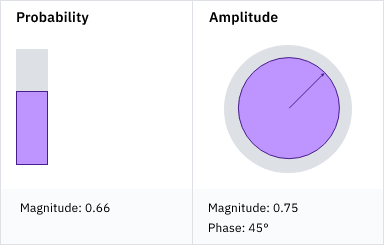

More specifically, an amplitude is a complex number

The result of phase is that, when we add two of these amplitudes together, they can cancel each other out, just like positive and negative numbers do. This behaviour is called interference and explains all the behaviour specific to quantum mechanics that we don’t see in classical mechanics.

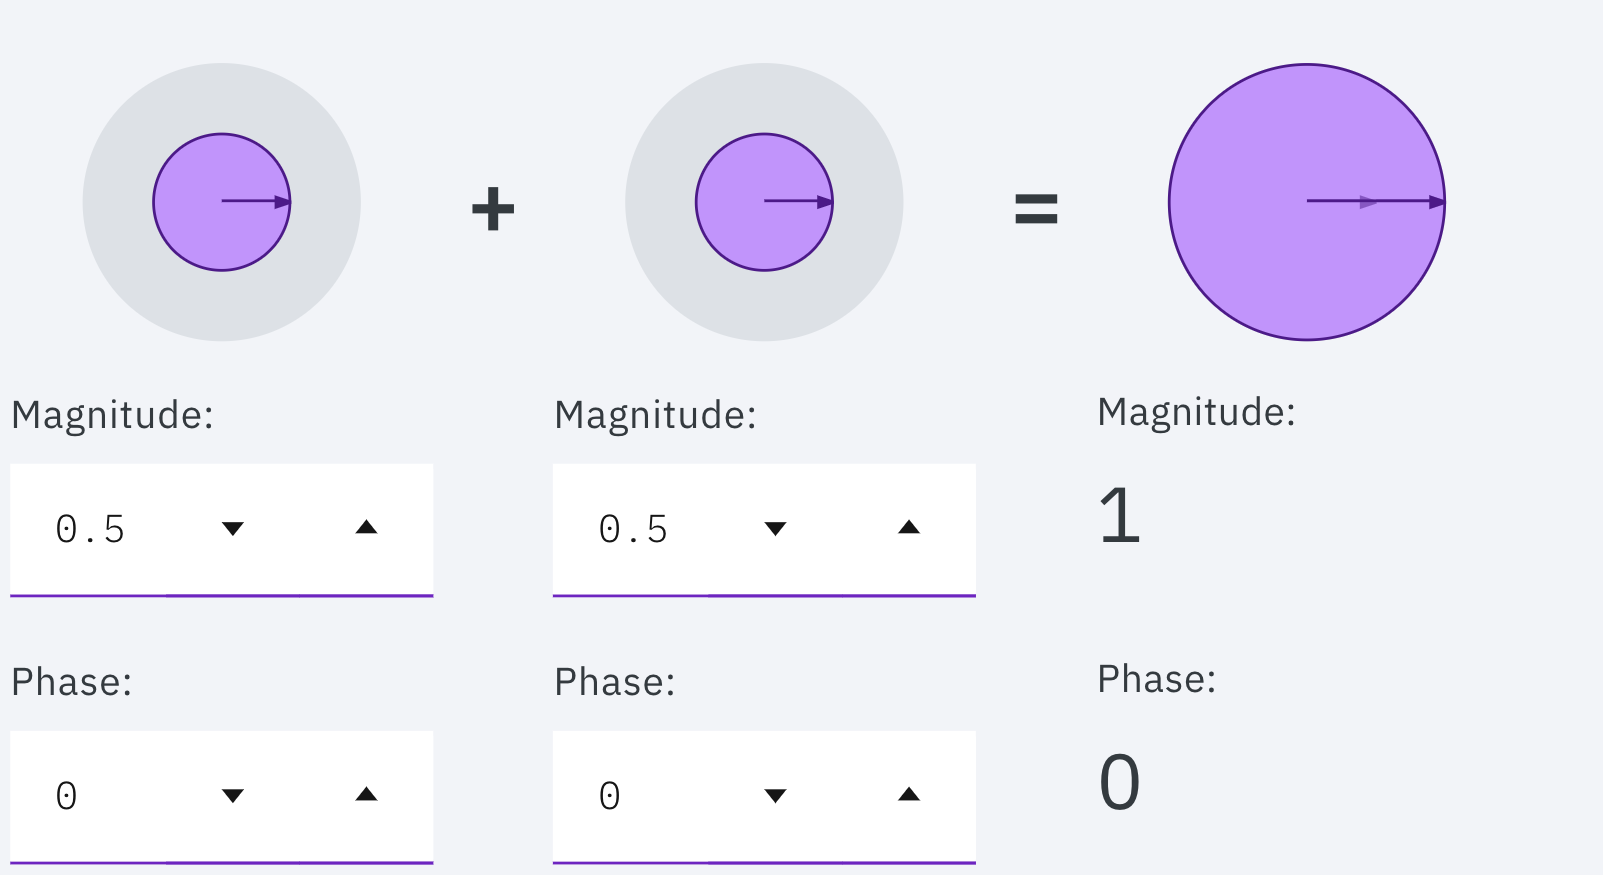

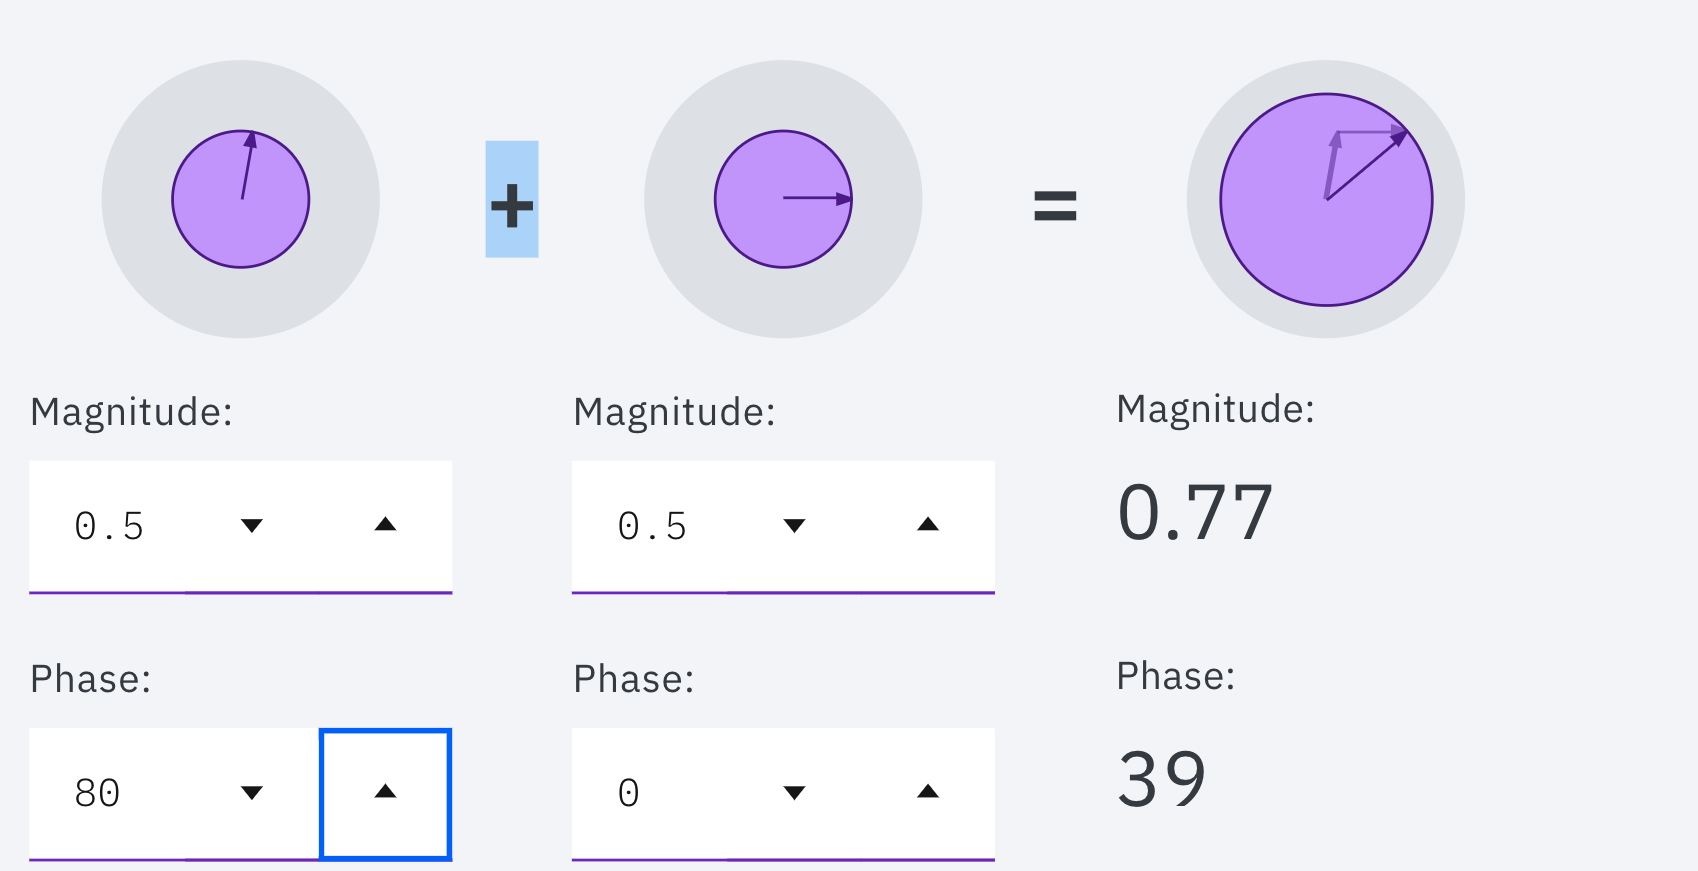

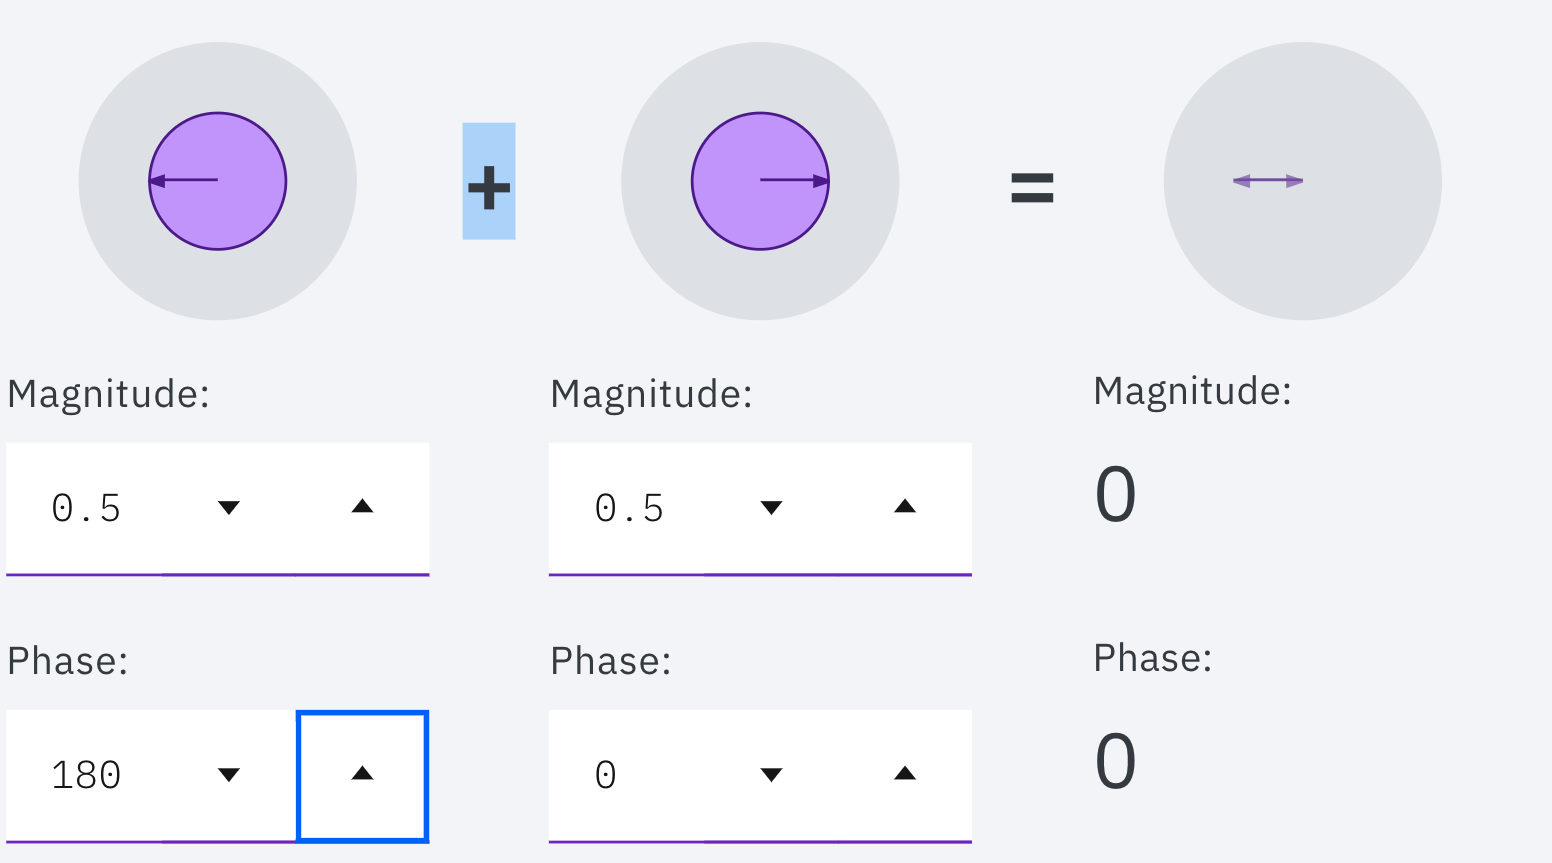

## Get the mode

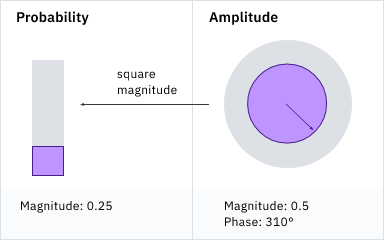

## With *new tool* to describe H-gate

## The reality is that the coin will be in one of these states and we use probabilities to deal with the fact that we don’t know which.



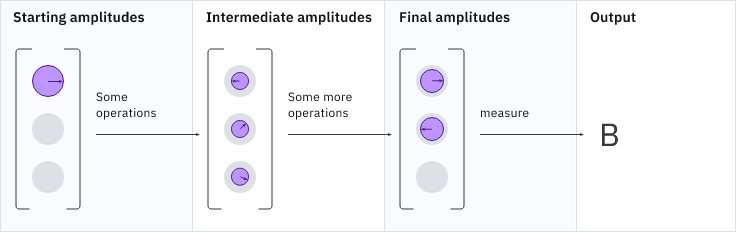

### the key points are:

+ We can make bits out of objects that follow the rules of quantum mechanics, and we call these “qubits”
+ These qubits can be described using probability amplitudes, which are like classical probabilities but with “phase”
+ These amplitudes can cancel each other out (an effect called interference) and this is what causes the previously unexplained behaviour
+ The best algorithms we have for simulating qubits use exponential resources with the number of qubits, so simulating large numbers of qubits is out of reach for classical computers.

#### The next interesting question is: “Can a quantum computer solve any other problems that a classical computer can’t?”. In this course we’ll see the answer is “yes”!



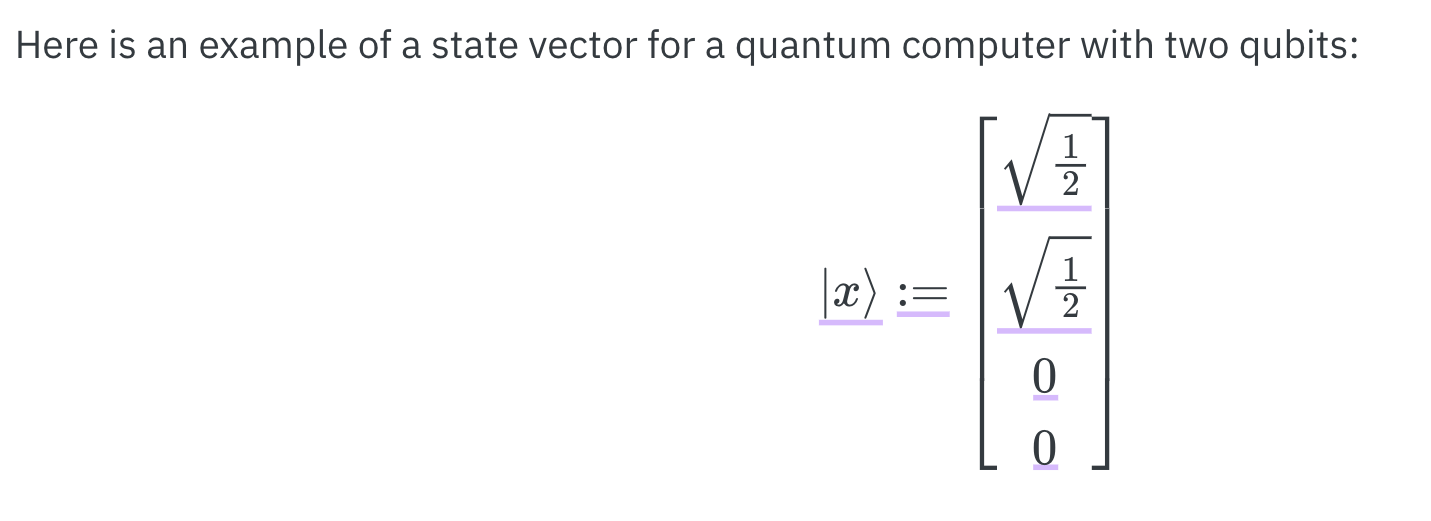

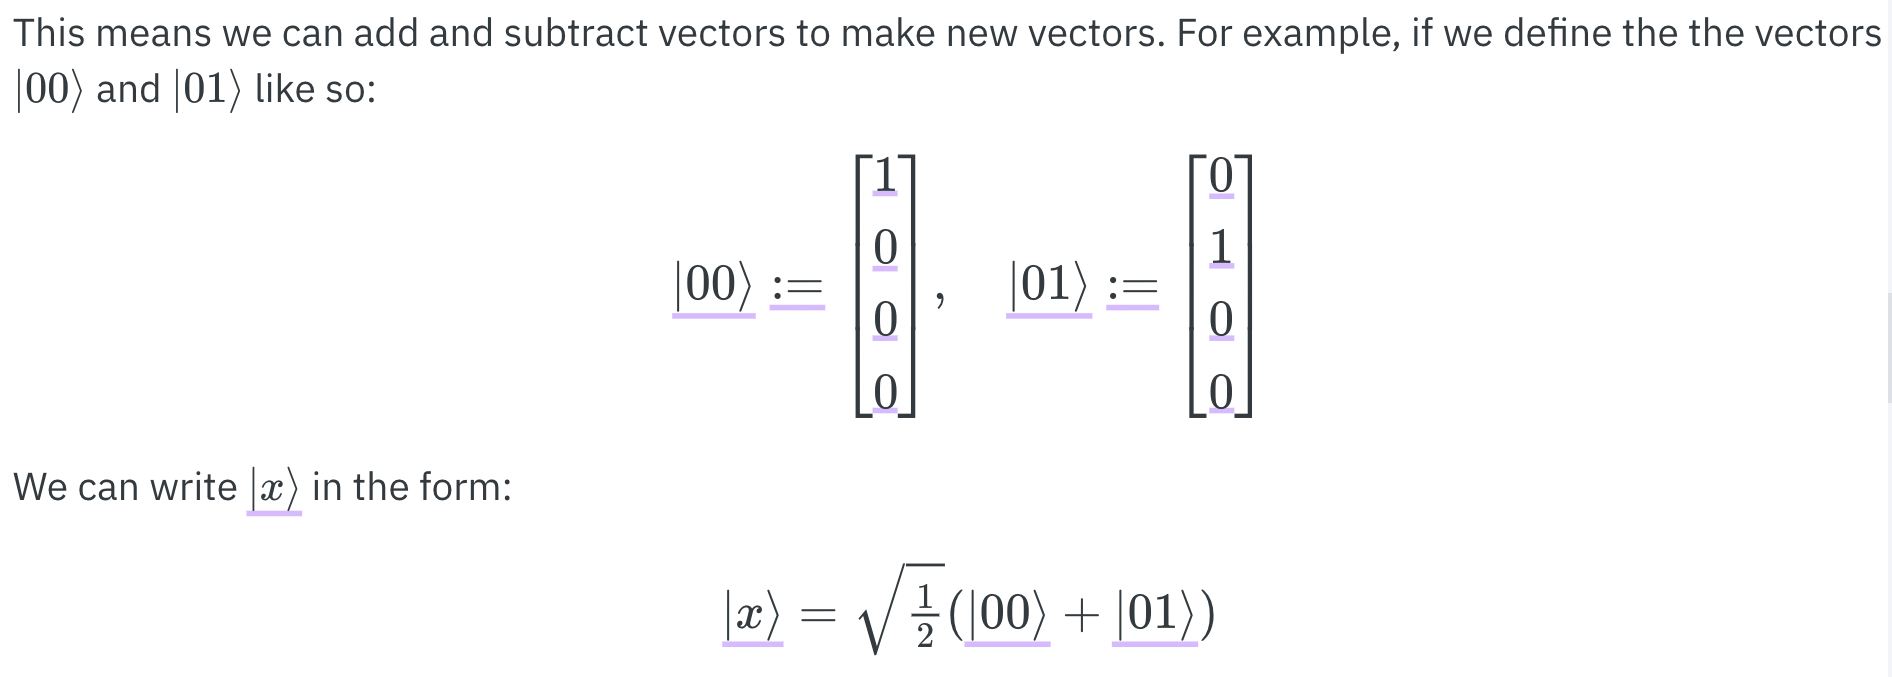

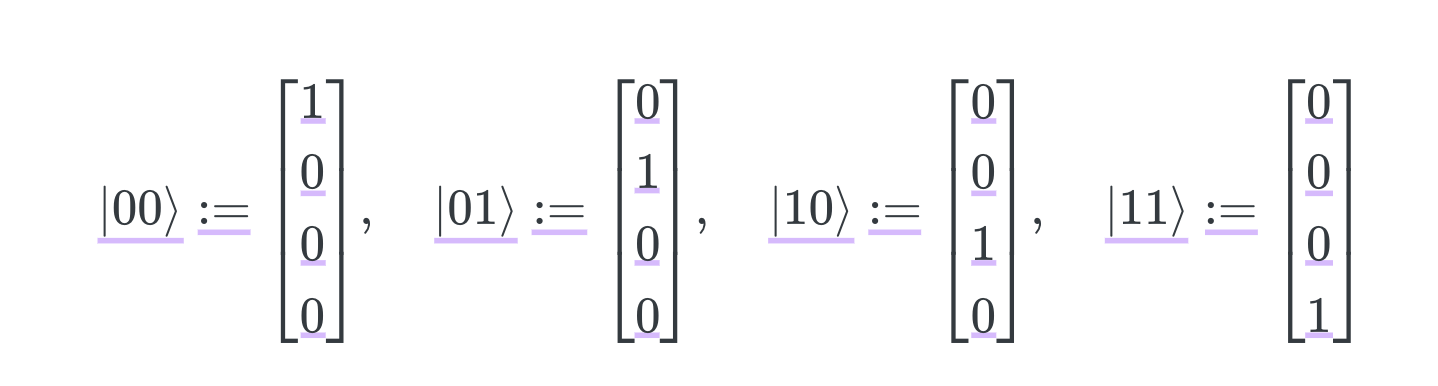

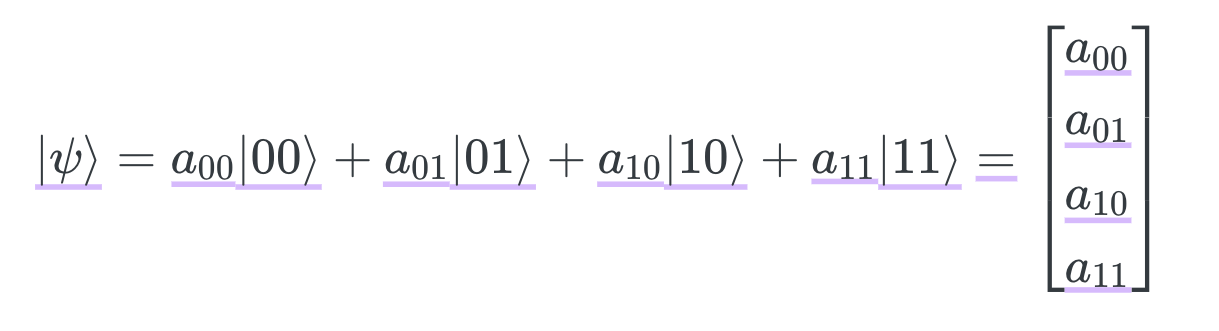

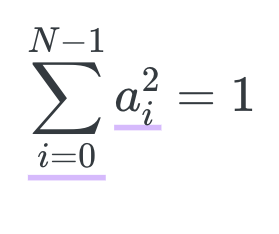

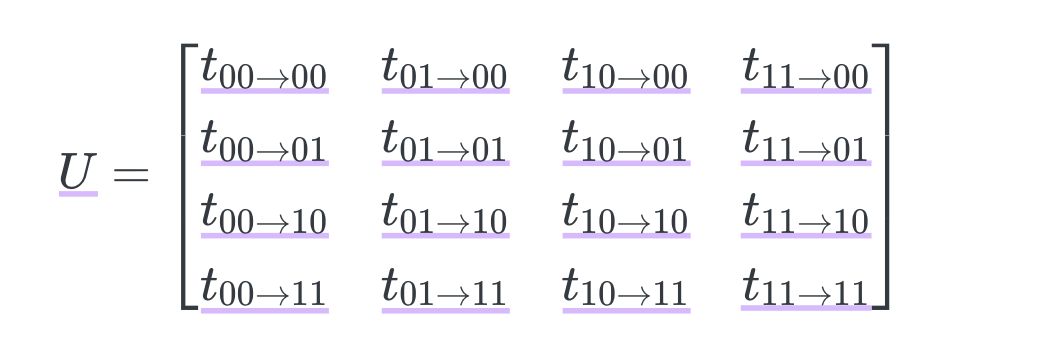

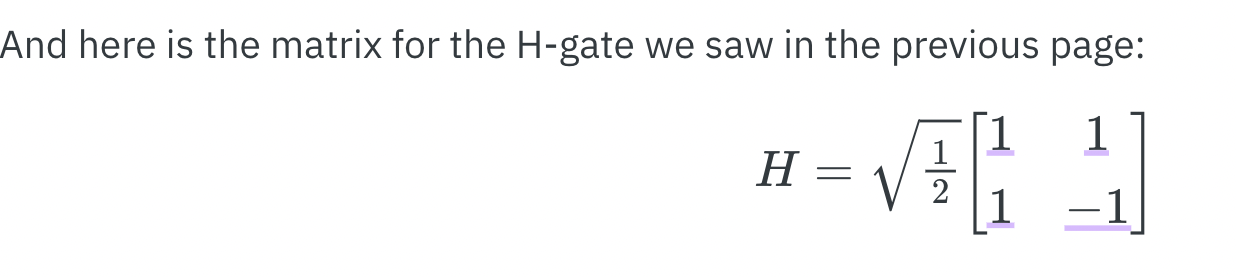

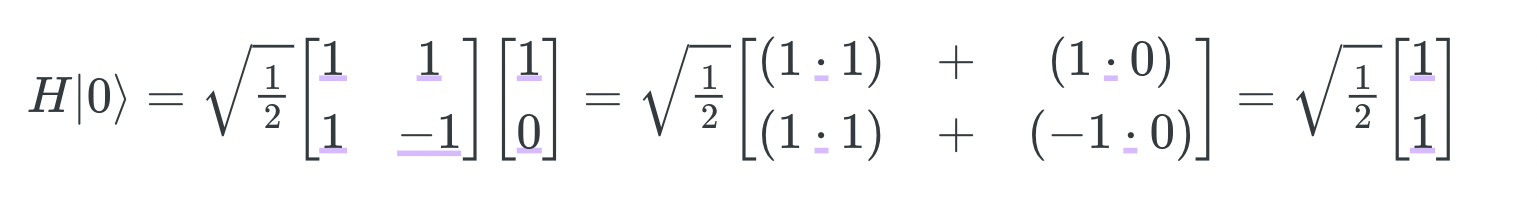

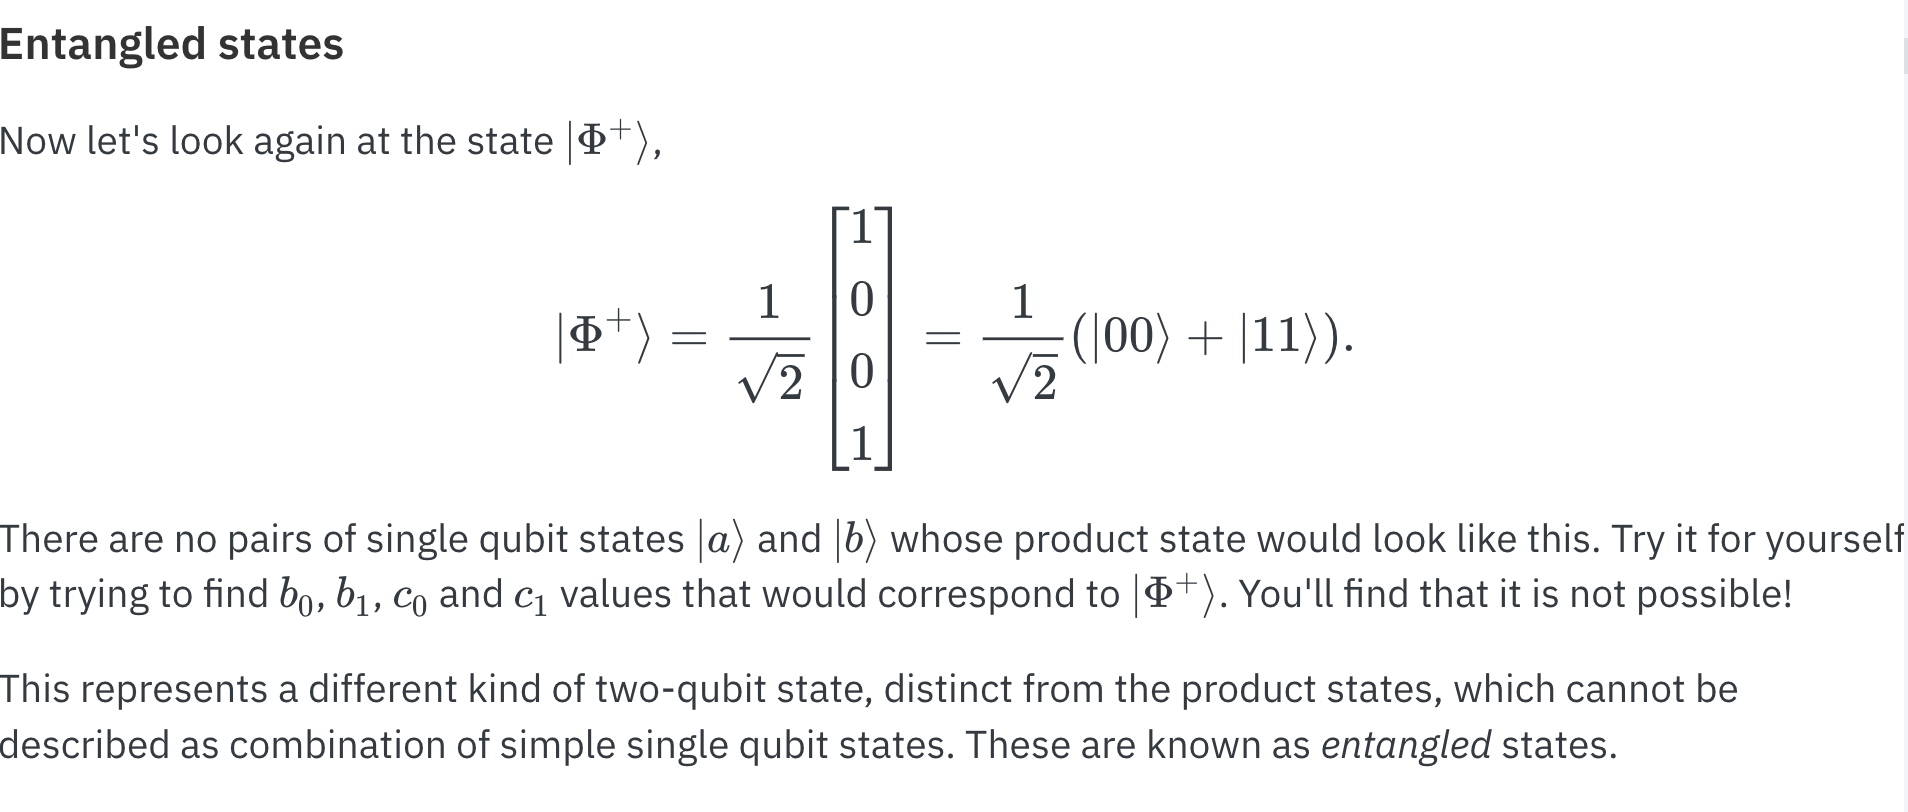

In [31]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
#qc.h(1) # after passing through the circuit 'qc'
ket = Statevector(qc)


# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()
#draw(qc)

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [32]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

Entanglement is a **key ingredient** of many aspects of quantum computing. It powers the algorithms and methods that we use, and it is a neccessary part of any quantum advantage. To get some idea of why this is, we'll take a few specific examples of entanglement in action.



Suppose we have two people, Alice and Bob. Alice wishes to send a two bit message to Bob - 00, 01, 10 or 11 - and wants to do it by sending qubits.

The simplest way to do this is with two qubits. Alice can simply use the qubits to encode the bit values, applying an x to flip them for a 1 state.



In [33]:
# The message
MESSAGE = '10'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

In [34]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'10': 1024}

## With Entagle

In [35]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [36]:
qc_bob = QuantumCircuit(2,2)
# Bob unentangles
qc_bob.cx(0,1)
qc_bob.h(0)
# Then measures
qc_bob.measure([0,1],[0,1])

In [37]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [38]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

In [39]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.x(1)
if MESSAGE[-1]=='1':
    qc_alice.z(1)

In [40]:
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

In [41]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

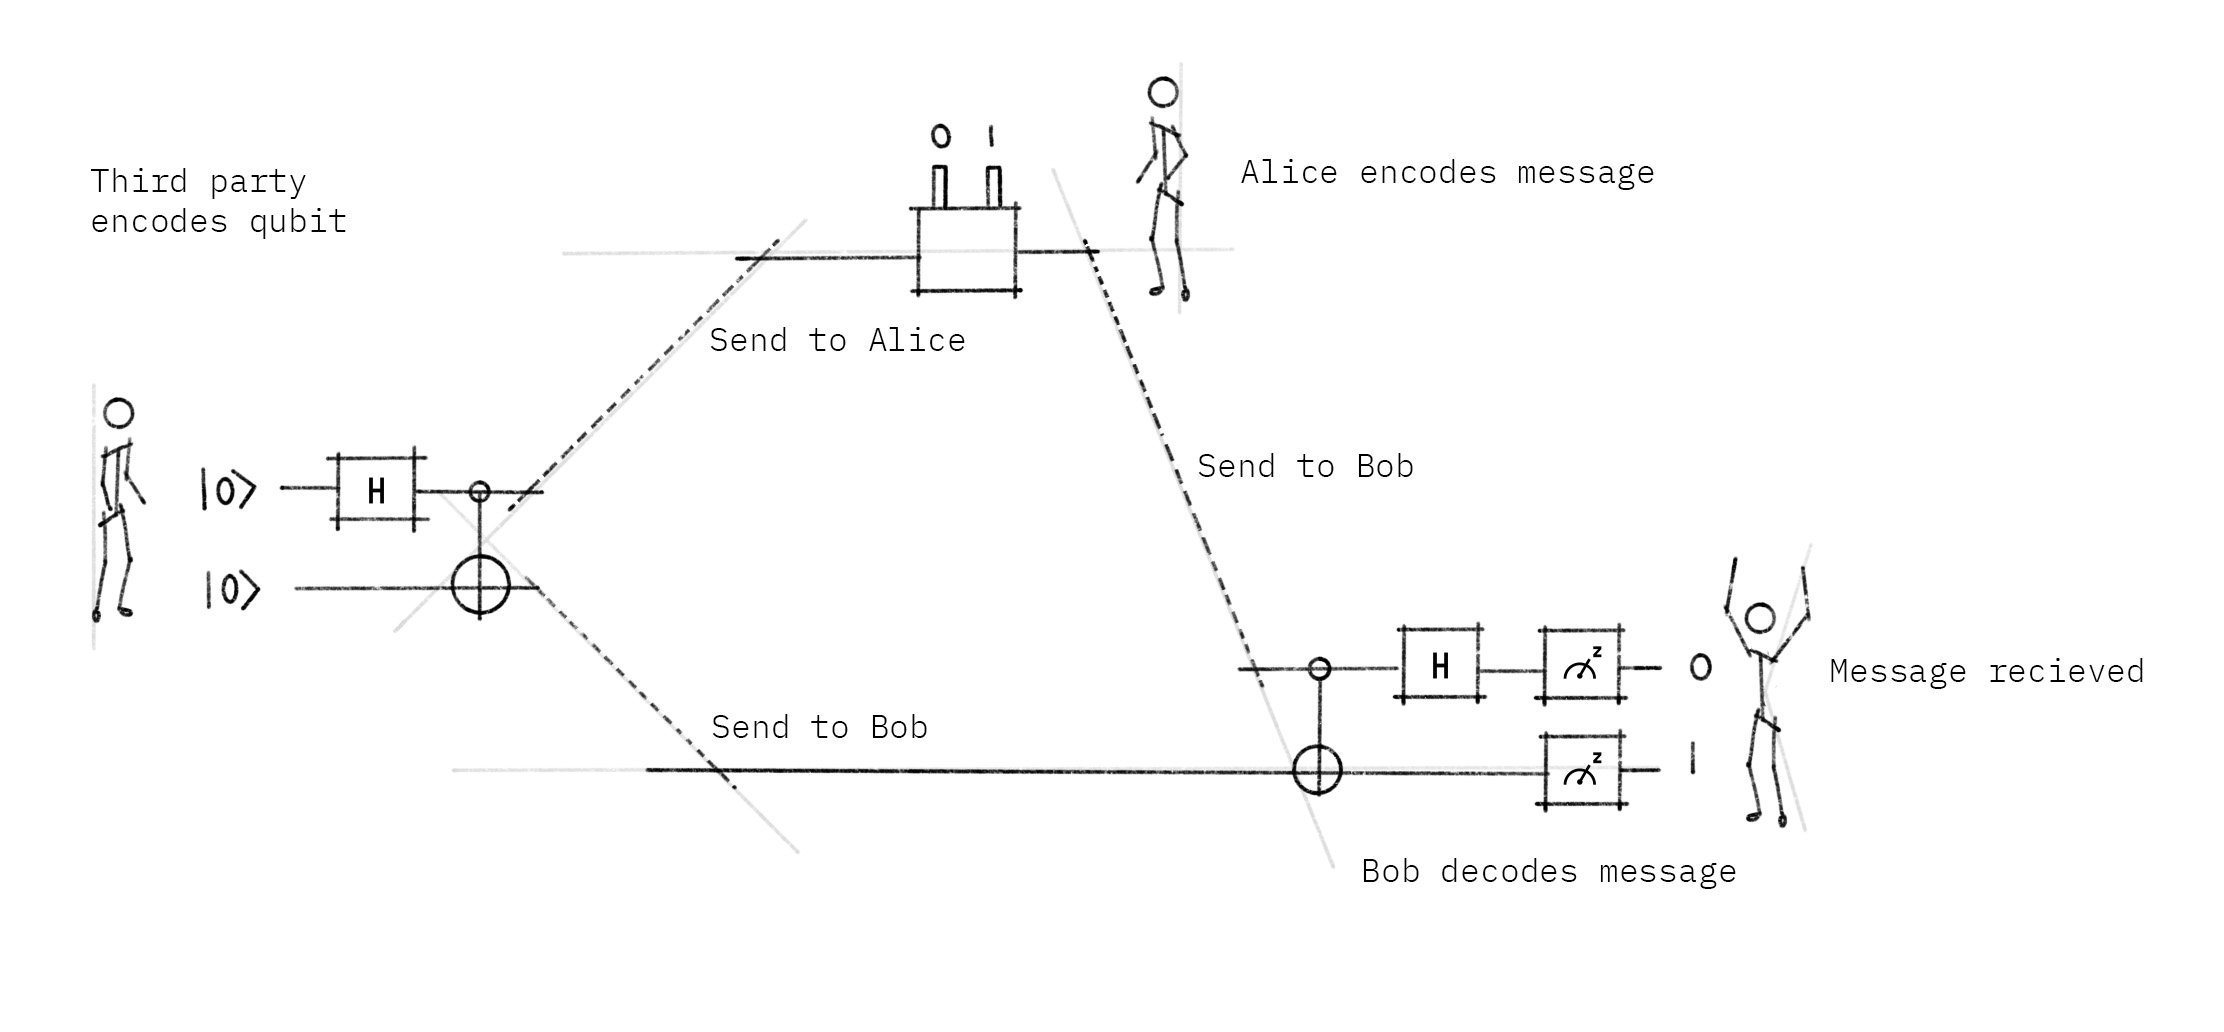